# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [1]:
from google.colab import files
uploaded = files.upload() #Uploaded image_1


Saving image_1.jpg to image_1 (2).jpg


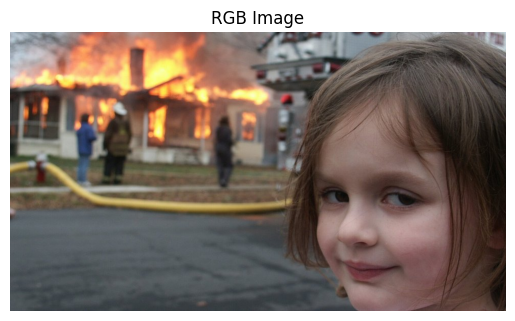

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("image_1.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("RGB Image")
plt.axis("off")
plt.show()

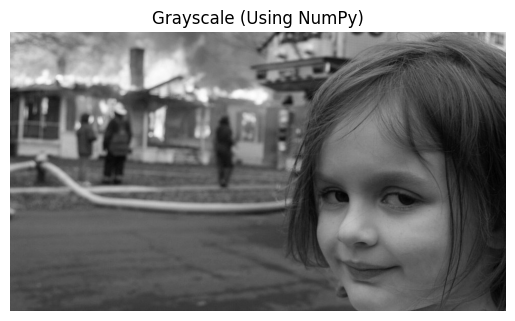

In [3]:

# Firstly using numpy to calculate grayscale
weights = np.array([0.2989, 0.5870, 0.1140])   # R,G,B weights
gray_numpy = (img_rgb * weights).sum(axis=2).astype(np.uint8)

plt.imshow(gray_numpy, cmap='gray')
plt.title("Grayscale (Using NumPy)")
plt.axis("off")
plt.show()

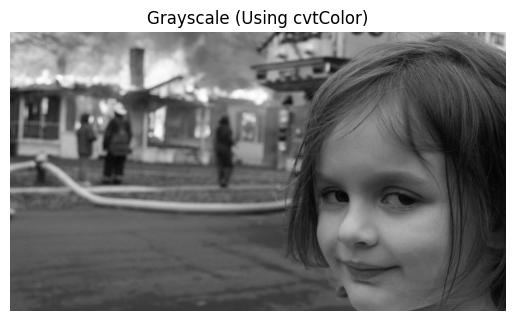

In [4]:
gray_cv2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_cv2, cmap='gray')
plt.title("Grayscale (Using cvtColor)")
plt.axis("off")
plt.show()


In [5]:
print("RGB image shape:", img_rgb.shape)
print("Gray (NumPy) shape:", gray_numpy.shape)
print("Gray (cv2) shape:", gray_cv2.shape)


RGB image shape: (549, 976, 3)
Gray (NumPy) shape: (549, 976)
Gray (cv2) shape: (549, 976)


In [6]:
print("First 3x3 pixels of RGB:\n", img_rgb[:3,:3,:])
print("First 3x3 pixels of grayscale (NumPy):\n", gray_numpy[:3,:3])
print("First 3x3 pixels of grayscale (cv2):\n", gray_cv2[:3,:3]) # RGB contains 3 color channels while grayscale contains only a single brightness channel


First 3x3 pixels of RGB:
 [[[181 189 200]
  [184 192 203]
  [185 195 207]]

 [[176 184 195]
  [180 188 199]
  [182 192 204]]

 [[170 178 189]
  [176 184 195]
  [179 189 201]]]
First 3x3 pixels of grayscale (NumPy):
 [[187 190 193]
 [182 186 190]
 [176 182 187]]
First 3x3 pixels of grayscale (cv2):
 [[188 191 193]
 [183 187 190]
 [177 183 187]]


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [7]:
g = gray_numpy.astype(float)  # Use grayscale image from above

F = np.fft.fft2(g) #

Fshift = np.fft.fftshift(F) # Shifting zero frequency to center

fshift = Fshift #  Store for later use


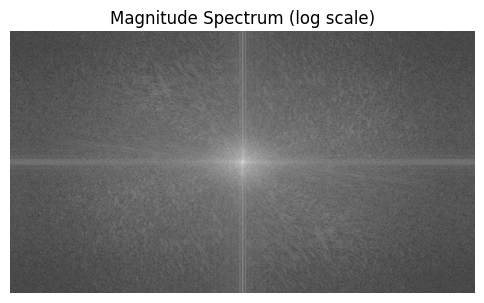

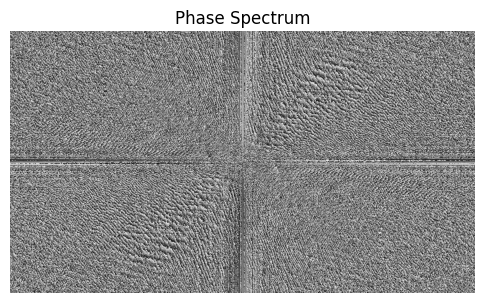

In [8]:

import numpy as np
import matplotlib.pyplot as plt


gray = gray_numpy.astype(float)

# Compute FFT
F = np.fft.fft2(gray)              # 2D FFT

fshift = np.fft.fftshift(F) # Shift low frequencies to center

magnitude = np.abs(fshift) # B2: Magnitude and Phase
phase = np.angle(fshift)

plt.figure(figsize=(6,6)) # Magnitude Spectrum
plt.imshow(np.log1p(magnitude), cmap='gray')
plt.title("Magnitude Spectrum (log scale)")
plt.axis("off")
plt.show()

plt.figure(figsize=(6,6)) # Phase Spectrum
plt.imshow(phase, cmap='gray')
plt.title("Phase Spectrum")
plt.axis("off")
plt.show()




## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

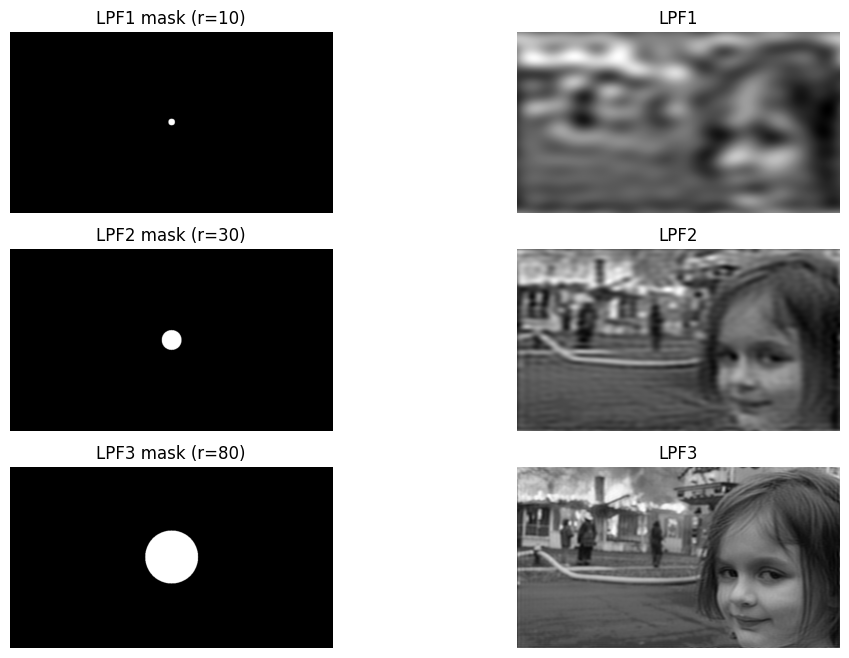

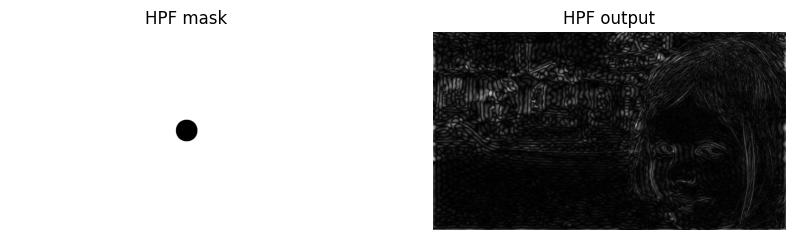

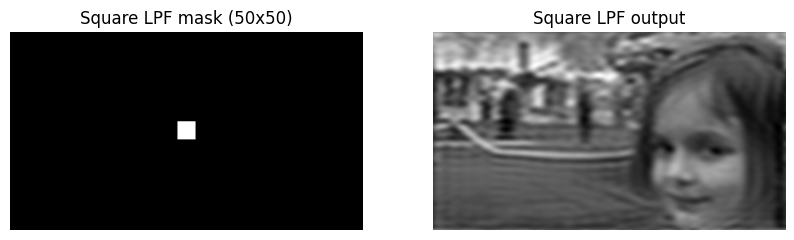

In [9]:
# ---------------- PART C (based exactly on class slides) ----------------
import numpy as np
import cv2
import matplotlib.pyplot as plt

# grayscale and fshift from Part B
gray = gray_numpy
F = fshift

rows, cols = gray.shape
crow, ccol = rows//2, cols//2

# Radii for C1
r1, r2, r3 = 10, 30, 80

# LPF1
mask_lpf1 = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_lpf1, (ccol, crow), r1, 1, -1)   # 1 inside circle
f_lpf1 = F * mask_lpf1

# LPF2
mask_lpf2 = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_lpf2, (ccol, crow), r2, 1, -1)
f_lpf2 = F * mask_lpf2

# LPF3
mask_lpf3 = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_lpf3, (ccol, crow), r3, 1, -1)
f_lpf3 = F * mask_lpf3

 # function to reconstruct
def reconstruct(freq_img):
    ishift = np.fft.ifftshift(freq_img)
    img_back = np.fft.ifft2(ishift)
    img_back = np.abs(img_back)
    img_back = img_back / img_back.max() * 255
    return img_back.astype(np.uint8)

# Reconstruct all LPF outputs
img_lpf1 = reconstruct(f_lpf1)
img_lpf2 = reconstruct(f_lpf2)
img_lpf3 = reconstruct(f_lpf3)

# Show LPF results
plt.figure(figsize=(12,8))
plt.subplot(3,2,1); plt.imshow(mask_lpf1, cmap='gray'); plt.title("LPF1 mask (r=10)"); plt.axis('off')
plt.subplot(3,2,2); plt.imshow(img_lpf1, cmap='gray'); plt.title("LPF1"); plt.axis('off')

plt.subplot(3,2,3); plt.imshow(mask_lpf2, cmap='gray'); plt.title("LPF2 mask (r=30)"); plt.axis('off')
plt.subplot(3,2,4); plt.imshow(img_lpf2, cmap='gray'); plt.title("LPF2"); plt.axis('off')

plt.subplot(3,2,5); plt.imshow(mask_lpf3, cmap='gray'); plt.title("LPF3 mask (r=80)"); plt.axis('off')
plt.subplot(3,2,6); plt.imshow(img_lpf3, cmap='gray'); plt.title("LPF3"); plt.axis('off')
plt.show()

# smaller radius = more blur because it removes more high frequency details.

 # High Pass Filter
mask_hpf = 1 - mask_lpf2
f_hpf = F * mask_hpf
img_hpf = reconstruct(f_hpf)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(mask_hpf, cmap='gray'); plt.title("HPF mask"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img_hpf, cmap='gray'); plt.title("HPF output"); plt.axis('off')
plt.show()

# Square LPF mask
side = 50
mask_square = np.zeros((rows, cols), np.uint8)


half = side//2
mask_square[crow-half:crow+half, ccol-half:ccol+half] = 1

f_square = F * mask_square
img_square = reconstruct(f_square)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(mask_square, cmap='gray'); plt.title("Square LPF mask (50x50)"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img_square, cmap='gray'); plt.title("Square LPF output"); plt.axis('off')
plt.show()



## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

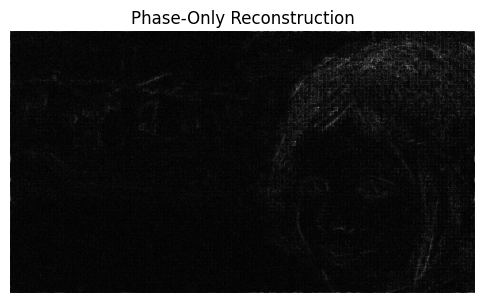

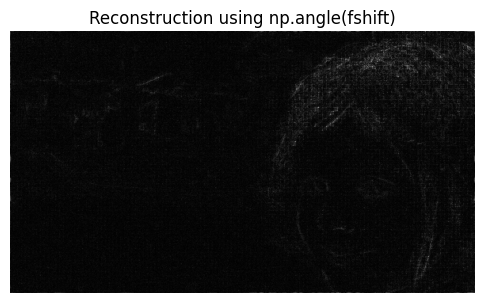

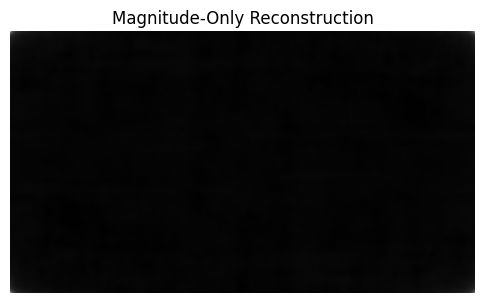

In [10]:
import numpy as np
import matplotlib.pyplot as plt

F = fshift


# assignment formula:
phase_only = F / (np.abs(F) + 1e-9)     # keep only phase (magnitude becomes 1)

# reconstruct
ishift_p = np.fft.ifftshift(phase_only)
img_p = np.fft.ifft2(ishift_p)
img_p = np.abs(img_p)
img_p = img_p / img_p.max() * 255
img_p = img_p.astype(np.uint8)

plt.figure(figsize=(6,5))
plt.imshow(img_p, cmap='gray')
plt.title("Phase-Only Reconstruction")
plt.axis('off')
plt.show()

# Here we used fshift to keep only the phase.
# In lecture  np.angle(fshift) is used , which gives only the phase values,
# but does NOT return a complex Fourier representation by itself.
# Try reconstruction with np.angle(fshift) directly:


#  trying reconstruction using np.angle(fshift)
phase_values = np.angle(F)           # these are just angles
F_wrong = np.exp(1j * phase_values)  # convert phase back into complex form

ishift_pw = np.fft.ifftshift(F_wrong)
img_pw = np.fft.ifft2(ishift_pw)
img_pw = np.abs(img_pw)
img_pw = img_pw / img_pw.max() * 255
img_pw = img_pw.astype(np.uint8)

plt.figure(figsize=(6,5))
plt.imshow(img_pw, cmap='gray')
plt.title("Reconstruction using np.angle(fshift)")
plt.axis('off')
plt.show()


# np.angle(fshift) alone loses magnitude information completely,
# so we must convert angles into complex numbers using exp(1j * phase).
# That's why reconstruction using np.angle(fshift) looks similar
# but may have scaling differences compared to the correct phase-only version.



# Magnitude only reconstruction
mag_only = np.abs(F)    # only magnitude, phase = 0 by default

ishift_m = np.fft.ifftshift(mag_only)
img_m = np.fft.ifft2(ishift_m)
img_m = np.abs(img_m)
img_m = img_m / img_m.max() * 255
img_m = img_m.astype(np.uint8)

plt.figure(figsize=(6,5))
plt.imshow(img_m, cmap='gray')
plt.title("Magnitude-Only Reconstruction")
plt.axis('off')
plt.show()


# magnitude-only loses all structural information because there is no phase.
# That's why the output looks like blurred noise.




# Magnitude Spectrum uses log() because magnitudes vary a LOT.
# Without log, most values become too small after inverse transform,
# so magnitude-only reconstruction looks very dark / flat.


## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

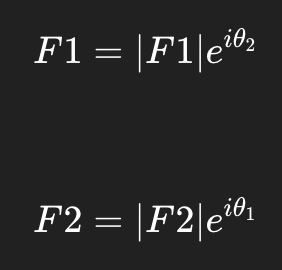

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [11]:
from google.colab import files
uploaded = files.upload()


Saving image_2.jpg to image_2.jpg


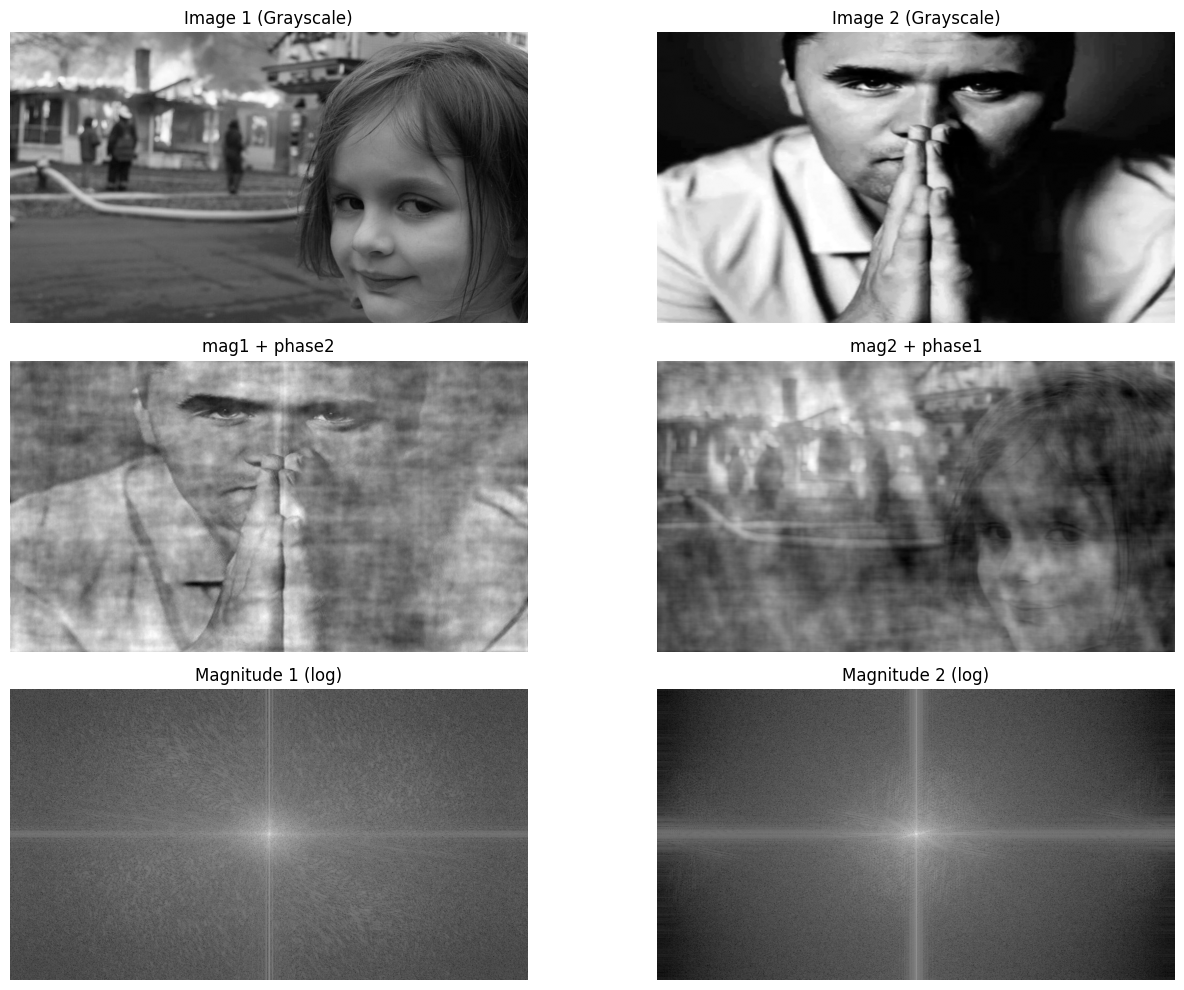

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img2 = cv2.imread("image_2.jpg")

img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY).astype(float)


H1, W1 = gray_numpy.shape
H2, W2 = img2_gray.shape

if (H1, W1) != (H2, W2):
    img2_gray = cv2.resize(img2_gray, (W1, H1)) # Resize second image to match first image dimensions

# FFT of both images

F1 = np.fft.fftshift(np.fft.fft2(gray_numpy.astype(float)))
F2 = np.fft.fftshift(np.fft.fft2(img2_gray))

mag1, phase1 = np.abs(F1), np.angle(F1)
mag2, phase2 = np.abs(F2), np.angle(F2)

# Create swapped FFTs

# magnitude of image1 + phase of image2
swap1 = mag1 * np.exp(1j * phase2)

# magnitude of image2 + phase of image1
swap2 = mag2 * np.exp(1j * phase1)

# Reconstruct swapped images
def reconstruct(F):
    img = np.fft.ifft2(np.fft.ifftshift(F))
    img = np.real(img)
    img -= img.min()
    img = img / img.max()
    img = (img * 255).astype(np.uint8)
    return img

img_swap1 = reconstruct(swap1)
img_swap2 = reconstruct(swap2)

# DISPLAY

plt.figure(figsize=(14,10))

plt.subplot(3,2,1)
plt.imshow(gray_numpy, cmap='gray')
plt.title("Image 1 (Grayscale)")
plt.axis("off")

plt.subplot(3,2,2)
plt.imshow(img2_gray, cmap='gray')
plt.title("Image 2 (Grayscale)")
plt.axis("off")

plt.subplot(3,2,3)
plt.imshow(img_swap1, cmap='gray')
plt.title("mag1 + phase2")
plt.axis("off")

plt.subplot(3,2,4)
plt.imshow(img_swap2, cmap='gray')
plt.title("mag2 + phase1")
plt.axis("off")

plt.subplot(3,2,5)
plt.imshow(np.log1p(mag1), cmap='gray')
plt.title("Magnitude 1 (log)")
plt.axis("off")

plt.subplot(3,2,6)
plt.imshow(np.log1p(mag2), cmap='gray')
plt.title("Magnitude 2 (log)")
plt.axis("off")

plt.tight_layout()
plt.show()

# Phase defines the structure , what the image looks like
# Magnitude shows the texture/brightness ,how intense things look
